<a href="https://colab.research.google.com/github/rrajkumar77/Industry-Grade-Data-Science/blob/main/Chirag_User_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Importing Libraries
# Import necessary libraries for data handling and visualization
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Creating the Dataset
# Simulate user behavior data
data = {
    "user_id": [1, 2, 3, 4, 5],
    "browsing_time": [5, 10, 3, 8, 12],  # in minutes
    "products_viewed": [3, 8, 2, 6, 10],
    "purchases": [1, 2, 0, 1, 3]
}

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [ ]:
df

,user_id,browsing_time,products_viewed,purchases
0,1,5,3,1
1,2,10,8,2
2,3,3,2,0
3,4,8,6,1
4,5,12,10,3


In [ ]:
# Step 3: Data Preprocessing
# Select features for clustering
features = ["browsing_time", "products_viewed", "purchases"]
df[features]

,browsing_time,products_viewed,purchases
0,5,3,1
1,10,8,2
2,3,2,0
3,8,6,1
4,12,10,3


In [ ]:
# Standardize the data for better clustering performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

In [ ]:
scaled_data

array([[-0.79708114, -0.93541435, -0.39223227],
       [ 0.73576721,  0.73496842,  0.58834841],
       [-1.41022048, -1.2694909 , -1.37281295],
       [ 0.12262787,  0.06681531, -0.39223227],
       [ 1.34890655,  1.40312152,  1.56892908]])

In [ ]:
# Step 4: Applying K-Means Clustering
# Perform clustering with K=2 (2 user segments)
kmeans = KMeans(n_clusters=2, random_state=42)
df['segment'] = kmeans.fit_predict(scaled_data)

In [ ]:
df['segment']

,segment
0,1
1,0
2,1
3,0
4,0


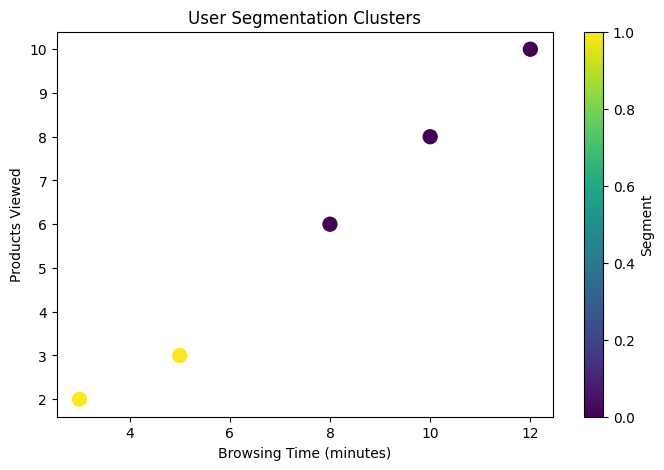

In [ ]:
# Step 5: Visualizing Clusters
# Plot browsing time vs products viewed, colored by cluster
plt.figure(figsize=(8, 5))
plt.scatter(df['browsing_time'], df['products_viewed'], c=df['segment'], cmap='viridis', s=100)
plt.xlabel('Browsing Time (minutes)')
plt.ylabel('Products Viewed')
plt.title('User Segmentation Clusters')
plt.colorbar(label='Segment')
plt.show()

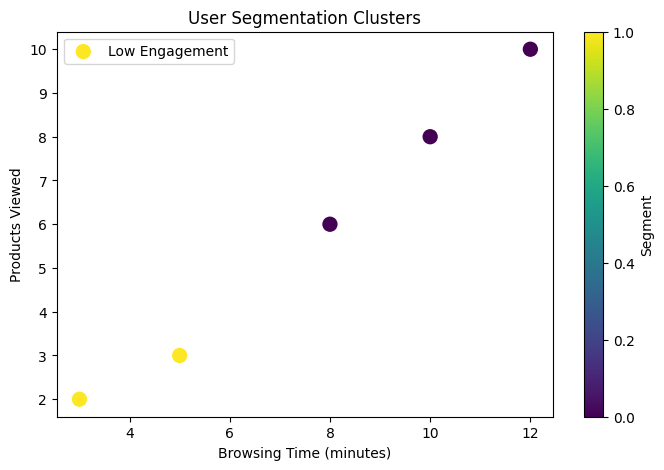

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['browsing_time'], df['products_viewed'], c=df['segment'], cmap='viridis', s=100)
plt.xlabel('Browsing Time (minutes)')
plt.ylabel('Products Viewed')
plt.title('User Segmentation Clusters')

# Define custom legend entries
legend_labels = ["Low Engagement", "Medium Engagement", "High Engagement"]  # Replace with your labels

# Add legend with custom entries
plt.legend(legend_labels)  # Modify labels as needed

plt.colorbar(label='Segment')
plt.show()

In [ ]:
# Step 6: Viewing Segmented Data
print("Segmented User Data:")
print(df)

Segmented User Data:
   user_id  browsing_time  products_viewed  purchases  segment
0        1              5                3          1        1
1        2             10                8          2        0
2        3              3                2          0        1
3        4              8                6          1        0
4        5             12               10          3        0
